# Preamble

It's customary to put all the imports in the beginning of the file. Various helper functions may also appear here.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

## Loading and inspecting data

We load the data from CSV as a Pandas data frame. It's the obvious first step to inspect what we have.

In [2]:
hitters = pd.read_csv('Hitters.csv')
hitters

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.0,N
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.0,A
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.0,A


## Preparing data

We immediately see a salary that is NaN (typically signifying that the information is unavailable). We can't use that for regression (or most of anything, really), so we just delete the rows.

In [3]:
hitters = hitters[hitters['Salary'].notna()]
hitters

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.0,N
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.0,A
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.0,A



Also, league and division are not numerical. We could drop them, but we might want to use them in our model. Instead, we replace them with 0 and 1. This is known as _one-hot encoding_. More about that below.

In [4]:
# A One-hot encoding for the League column
league_columns = pd.get_dummies(hitters['League'])
league_columns

,A,N
1,False,True
2,True,False
3,False,True
4,False,True
5,True,False
...,...,...
317,False,True
318,True,False
319,True,False
320,True,False


First, we get two columns. One for each different value. In each row, only one of A or N will be true (the "hot" one).

Second, this is not what we wanted. We are doing linear regression, so we need 0 and 1. Also, there is another column that has values 'A' and 'N', so we can't use these names.

Let's try again:

In [5]:
league_columns = pd.get_dummies(hitters['League'], prefix='League', dtype='int')
league_columns

,League_A,League_N
1,0,1
2,1,0
3,0,1
4,0,1
5,1,0
...,...,...
317,0,1
318,1,0
319,1,0
320,1,0


We now need to add the two new columns and drop the old 'League' column. Note, that it's redundant to have both columns as they are always opposite of each other. We'll drop one of them, too.

Finishing the data set up:

In [6]:
division_columns = pd.get_dummies(hitters['Division'], prefix='Division', dtype='int')
new_league_columns = pd.get_dummies(hitters['NewLeague'], prefix='NewLeague', dtype='int')
hitters = pd.concat([hitters, league_columns, division_columns, new_league_columns], axis='columns')
hitters = hitters.drop(['League', 'Division', 'NewLeague', 'League_N', 'Division_W', 'NewLeague_N'], axis=1)
hitters

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_A,Division_E,NewLeague_A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0,0,0,0
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0,1,0,1
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0,0,1,0
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5,0,1,0
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,325,9,3,700.0,0,1,0
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,313,381,20,875.0,1,1,1
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,37,113,7,385.0,1,0,1
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,1314,131,12,960.0,1,1,1


## Correlation Matrix

Let's look at the correlation matrix.

In [7]:
correlation_matrix = pd.DataFrame.corr(hitters) # method='pearson' is default 
correlation_matrix

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_A,Division_E,NewLeague_A
AtBat,1.000000,0.963969,0.555102,0.899829,0.796015,0.624448,0.012725,0.207166,0.225341,0.212422,0.237278,0.221393,0.132926,0.309607,0.342117,0.325577,0.394771,0.153176,0.056341,0.089838
Hits,0.963969,1.000000,0.530627,0.910630,0.788478,0.587311,0.018598,0.206678,0.235606,0.189364,0.238896,0.219384,0.122971,0.299688,0.303975,0.279876,0.438675,0.153522,0.083266,0.094990
HmRun,0.555102,0.530627,1.000000,0.631076,0.849107,0.440454,0.113488,0.217464,0.217496,0.492526,0.258347,0.349858,0.227183,0.250931,-0.161602,-0.009743,0.343028,0.222965,0.034851,0.199424
Runs,0.899829,0.910630,0.631076,1.000000,0.778692,0.697015,-0.011975,0.171811,0.191327,0.229701,0.237831,0.202335,0.163700,0.271160,0.179258,0.192609,0.419859,0.206001,0.107672,0.154911
RBI,0.796015,0.788478,0.849107,0.778692,1.000000,0.569505,0.129668,0.278126,0.292137,0.442190,0.307226,0.387777,0.233619,0.312065,0.062902,0.150155,0.449457,0.185858,0.090157,0.143549
Walks,0.624448,0.587311,0.440454,0.697015,0.569505,1.000000,0.134793,0.269450,0.270795,0.349582,0.332977,0.312697,0.429140,0.280855,0.102523,0.081937,0.443867,0.065760,0.072732,0.028461
Years,0.012725,0.018598,0.113488,-0.011975,0.129668,0.134793,1.000000,0.915681,0.897844,0.722371,0.876649,0.863809,0.837524,-0.020019,-0.085118,-0.156512,0.400657,0.032893,0.020316,0.023964
CAtBat,0.207166,0.206678,0.217464,0.171811,0.278126,0.269450,0.915681,1.000000,0.995057,0.801676,0.982747,0.950730,0.906712,0.053393,-0.007897,-0.070478,0.526135,0.023704,0.018623,0.004294
CHits,0.225341,0.235606,0.217496,0.191327,0.292137,0.270795,0.897844,0.995057,1.000000,0.786652,0.984542,0.946797,0.890718,0.067348,-0.013144,-0.068036,0.548910,0.022853,0.023642,-0.000887
CHmRun,0.212422,0.189364,0.492526,0.229701,0.442190,0.349582,0.722371,0.801676,0.786652,1.000000,0.825625,0.927903,0.810878,0.093822,-0.188886,-0.165369,0.524931,0.107299,0.026987,0.100298


This is hard to read, so we usually like to color code it. Remember to set vmin and vmax to ensure that 0 will be the most neutral value.

In [8]:
correlation_matrix.style.background_gradient(cmap='coolwarm', vmin=-1, vmax=1).format(precision=2)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_A,Division_E,NewLeague_A
AtBat,1.00,0.96,0.56,0.90,0.80,0.62,0.01,0.21,0.23,0.21,0.24,0.22,0.13,0.31,0.34,0.33,0.39,0.15,0.06,0.09
Hits,0.96,1.00,0.53,0.91,0.79,0.59,0.02,0.21,0.24,0.19,0.24,0.22,0.12,0.30,0.30,0.28,0.44,0.15,0.08,0.09
HmRun,0.56,0.53,1.00,0.63,0.85,0.44,0.11,0.22,0.22,0.49,0.26,0.35,0.23,0.25,-0.16,-0.01,0.34,0.22,0.03,0.20
Runs,0.90,0.91,0.63,1.00,0.78,0.70,-0.01,0.17,0.19,0.23,0.24,0.20,0.16,0.27,0.18,0.19,0.42,0.21,0.11,0.15
RBI,0.80,0.79,0.85,0.78,1.00,0.57,0.13,0.28,0.29,0.44,0.31,0.39,0.23,0.31,0.06,0.15,0.45,0.19,0.09,0.14
Walks,0.62,0.59,0.44,0.70,0.57,1.00,0.13,0.27,0.27,0.35,0.33,0.31,0.43,0.28,0.10,0.08,0.44,0.07,0.07,0.03
Years,0.01,0.02,0.11,-0.01,0.13,0.13,1.00,0.92,0.90,0.72,0.88,0.86,0.84,-0.02,-0.09,-0.16,0.40,0.03,0.02,0.02
CAtBat,0.21,0.21,0.22,0.17,0.28,0.27,0.92,1.00,1.00,0.80,0.98,0.95,0.91,0.05,-0.01,-0.07,0.53,0.02,0.02,0.00
CHits,0.23,0.24,0.22,0.19,0.29,0.27,0.90,1.00,1.00,0.79,0.98,0.95,0.89,0.07,-0.01,-0.07,0.55,0.02,0.02,-0.00
CHmRun,0.21,0.19,0.49,0.23,0.44,0.35,0.72,0.80,0.79,1.00,0.83,0.93,0.81,0.09,-0.19,-0.17,0.52,0.11,0.03,0.10


Some of these are very highly correlated. Often, we would say that we can delete a lot of them, but lets examine them more closely.

In [9]:
correlation_matrix = pd.DataFrame.corr(hitters[['Years', 'CAtBat', 'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks']])
correlation_matrix.style.background_gradient(cmap='coolwarm', vmin=-1, vmax=1).format(precision=2)


,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks
Years,1.00,0.92,0.90,0.72,0.88,0.86,0.84
CAtBat,0.92,1.00,1.00,0.80,0.98,0.95,0.91
CHits,0.90,1.00,1.00,0.79,0.98,0.95,0.89
CHmRun,0.72,0.80,0.79,1.00,0.83,0.93,0.81
CRuns,0.88,0.98,0.98,0.83,1.00,0.95,0.93
CRBI,0.86,0.95,0.95,0.93,0.95,1.00,0.89
CWalks,0.84,0.91,0.89,0.81,0.93,0.89,1.00


So 'Years' is highly correlated with all the features that start with a 'C'. Years is the length of the players career; C stands for career, so CHits are the career hits. 

Clearly, the longer the carreer, the more career hits you would have made, so it makes sense to replace all the career data with the average per year.

Another thing that shows up in the correlations is that a player has more hits, home runs, walks, etc. the more times he's at bat. It makes sense to replace them with a success rate: CHits/CAtBat, etc. The same applies to the non-career versions.

In [10]:
hitters['Hits'] = hitters['Hits'] / hitters['AtBat']
hitters['HmRun'] = hitters['HmRun'] / hitters['AtBat']
hitters['Runs'] = hitters['Runs'] / hitters['AtBat']
hitters['RBI'] = hitters['RBI'] / hitters['AtBat']
hitters['Walks'] = hitters['Walks'] / hitters['AtBat']

hitters['CHits'] = hitters['CHits'] / hitters['CAtBat']
hitters['CHmRun'] = hitters['CHmRun'] / hitters['CAtBat']
hitters['CRuns'] = hitters['CRuns'] / hitters['CAtBat']
hitters['CRBI'] = hitters['CRBI'] / hitters['CAtBat']
hitters['CWalks'] = hitters['CWalks'] / hitters['CAtBat']

hitters['CAtBat'] = hitters['CAtBat'] / hitters['Years']


In [11]:
correlation_matrix = pd.DataFrame.corr(hitters)
correlation_matrix.style.background_gradient(cmap='coolwarm', vmin=-1, vmax=1).format(precision=2)


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_A,Division_E,NewLeague_A
AtBat,1.00,0.40,0.08,0.32,0.13,-0.01,0.01,0.65,0.45,0.10,0.34,0.17,-0.08,0.31,0.34,0.33,0.39,0.15,0.06,0.09
Hits,0.40,1.00,0.10,0.48,0.30,0.02,0.09,0.34,0.70,-0.03,0.25,0.14,-0.06,0.08,0.01,0.01,0.20,0.10,0.07,0.07
HmRun,0.08,0.10,1.00,0.37,0.79,0.20,0.16,0.11,0.08,0.84,0.28,0.71,0.18,0.12,-0.36,-0.20,0.15,0.16,0.01,0.18
Runs,0.32,0.48,0.37,1.00,0.31,0.39,-0.02,0.27,0.33,0.26,0.70,0.19,0.30,0.04,-0.14,-0.09,0.16,0.17,0.13,0.17
RBI,0.13,0.30,0.79,0.31,1.00,0.21,0.24,0.15,0.22,0.66,0.17,0.77,0.16,0.12,-0.28,-0.14,0.19,0.11,0.04,0.11
Walks,-0.01,0.02,0.20,0.39,0.21,1.00,0.17,0.08,0.01,0.21,0.33,0.21,0.86,0.08,-0.15,-0.16,0.16,-0.06,0.04,-0.05
Years,0.01,0.09,0.16,-0.02,0.24,0.17,1.00,0.33,0.32,0.04,0.10,0.18,0.10,-0.02,-0.09,-0.16,0.40,0.03,0.02,0.02
CAtBat,0.65,0.34,0.11,0.27,0.15,0.08,0.33,1.00,0.57,0.10,0.39,0.19,-0.01,0.19,0.21,0.19,0.50,0.05,0.02,0.01
CHits,0.45,0.70,0.08,0.33,0.22,0.01,0.32,0.57,1.00,0.05,0.43,0.27,-0.06,0.15,-0.04,-0.05,0.48,0.02,0.09,-0.03
CHmRun,0.10,-0.03,0.84,0.26,0.66,0.21,0.04,0.10,0.05,1.00,0.35,0.85,0.22,0.18,-0.37,-0.20,0.23,0.15,0.01,0.18


## Outliers and Skewedness

The boxplot below reveals a number of outliers.

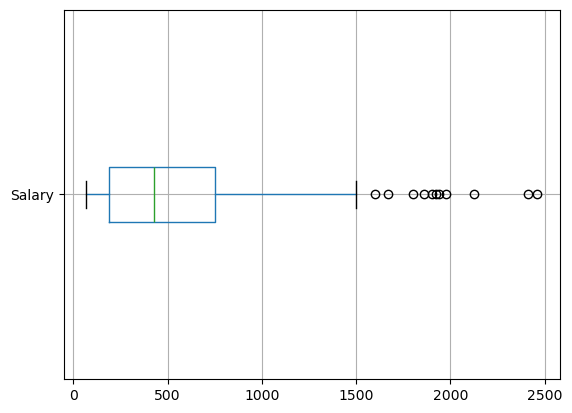

In [42]:
hitters[['Salary']].boxplot(vert=False)

plt.show()

It also reveals something else. Notice how the median (green line) is in the left of center of the box. This means that the data to the right of the median (higher than the median) is more spread out than to the left. Both contain 25% of the data, so we will expect this distribution to have a mean that's higher than the median, meaning it's _right_ skewed.

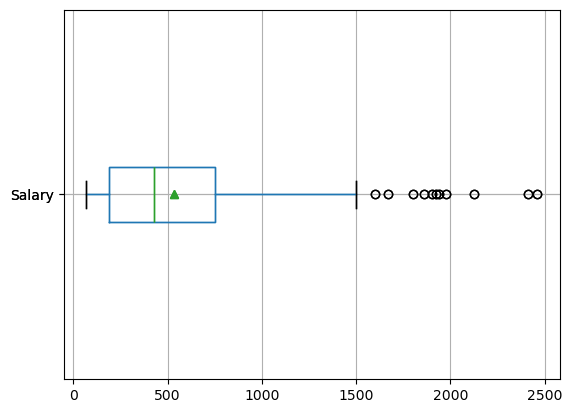

In [44]:
hitters[['Salary']].boxplot(vert=False, showmeans=True)
plt.show()

Let's look a some methods for normalizing a right-skewed distribution.

First applying square root.

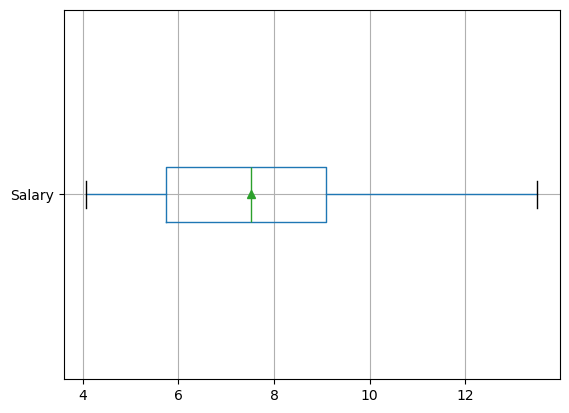

In [ ]:
hitters[['Salary']].apply(np.sqrt).boxplot(vert=False, showmeans=True)
plt.show()

Applying cubic root:

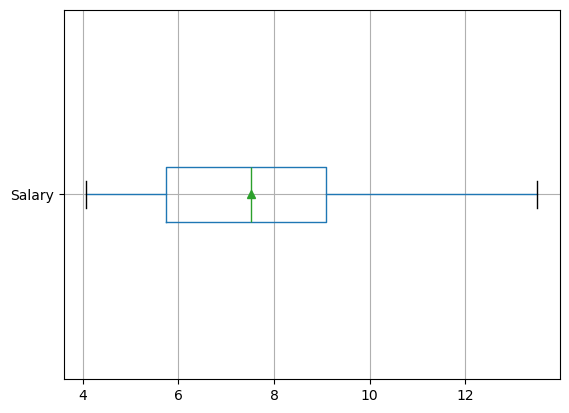

In [53]:
hitters[['Salary']].apply(np.cbrt).boxplot(vert=False, showmeans=True)
plt.show()

Applying logarithm.

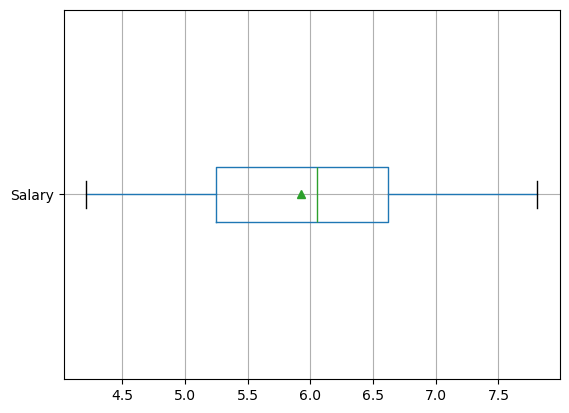

In [48]:
hitters[['Salary']].apply(np.log).boxplot(vert=False, showmeans=True)
plt.show()

Cubic root is perfect.

Let's give the features a similar treatment. Let's inspect them first.

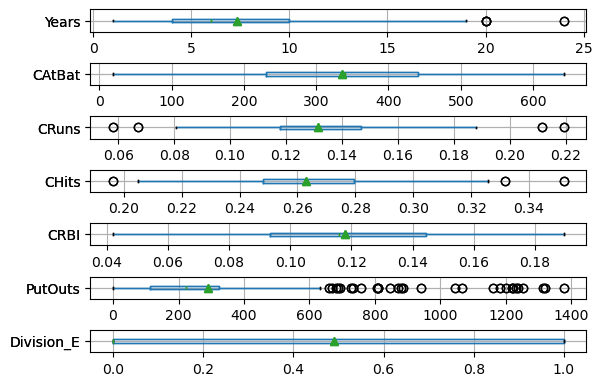

In [50]:
selectedFeatures = ['Years', 'CAtBat', 'CRuns', 'CHits', 'CRBI', 'PutOuts', 'Division_E']

for idx, f in enumerate(selectedFeatures):
  plt.subplot(2*len(selectedFeatures), 1, 2*idx + 1)
  hitters[[f]].boxplot(vert=False, showmeans=True)

plt.show()

Square root.

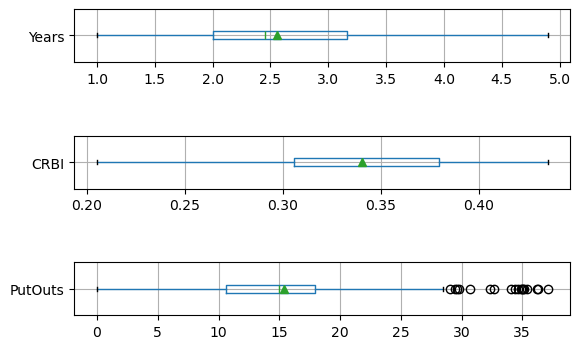

In [55]:
skewedFeatures = ['Years', 'CRBI', 'PutOuts']

for idx, f in enumerate(skewedFeatures):
  plt.subplot(2*len(skewedFeatures), 1, 2*idx + 1)
  hitters[[f]].apply(np.sqrt).boxplot(vert=False, showmeans=True)

plt.show()

Cubic root.

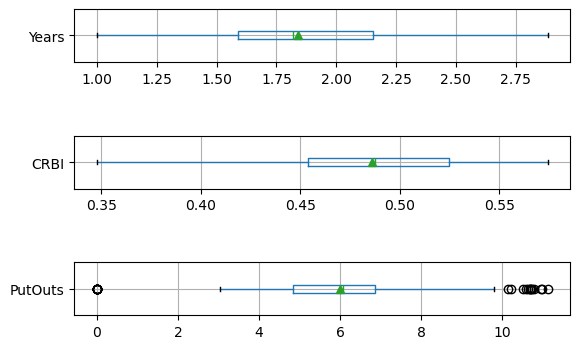

In [54]:
for idx, f in enumerate(skewedFeatures):
  plt.subplot(2*len(skewedFeatures), 1, 2*idx + 1)
  hitters[[f]].apply(np.cbrt).boxplot(vert=False, showmeans=True)

plt.show()

Logarithm.

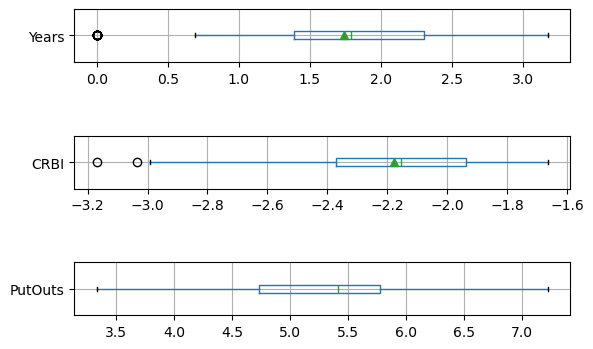

In [57]:
for idx, f in enumerate(skewedFeatures):
  plt.subplot(2*len(skewedFeatures), 1, 2*idx + 1)
  hitters[[f]].apply(np.log).boxplot(vert=False, showmeans=True)

plt.show()

I combine my conclusions below.

In [58]:
X = hitters[selectedFeatures].copy().drop(['Years', 'CRBI', 'PutOuts'], axis = 1)

X['Years'] = hitters['Years'].apply(np.cbrt)
X['CRBI'] = hitters['CRBI'].apply(np.sqrt)
X['PutOuts'] = hitters['PutOuts'].apply(np.sqrt)

y = hitters['Salary'].apply(np.cbrt)

Let's apply linear regression and see if there is an approvement.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = .2, random_state = 504)


In [77]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

ols = LinearRegression()
ols.fit(X_train, y_train)
ols.score(X_train, y_train), ols.score(X_test, y_test)

(0.5777095721948788, 0.6070687207581462)

In [78]:
ridge = Ridge(alpha=8)
ridge.fit(X_train, y_train)
ridge.score(X_train, y_train), ridge.score(X_test, y_test)

(0.5773089120363317, 0.6076731757310659)

In [79]:
lasso = Lasso(alpha=.001)
lasso.fit(X_train, y_train)
lasso.score(X_train, y_train), lasso.score(X_test, y_test)

(0.5777087425524251, 0.6070582057625147)

This is an improvement on R^2 of about .07 7 percentage points), which is considerable considering we haven't changed the algorithm.

The result is still not the best and sometimes that's just the way it is. The data probably isn't linear. To test that, let's make a quadratic equation.

In [84]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 2)
X2 = poly.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size = .2, random_state = 504)

ols.fit(X_train, y_train)
ols.score(X_train, y_train), ols.score(X_test, y_test)

(0.7210046059704747, 0.7123756594790926)

This seems to confirm that we need something non-linear. This doesn't seem to be the perfect solution either.